### Preparing the tools

Importing the libraries

In [31]:
# EDA and plotting libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

## Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

## Model evaluators
from sklearn.model_selection import train_test_split

In [32]:
pip install seaborn

In [33]:
df = pd.read_csv("Drugs_Poisining.csv") # 'DataFrame' shortened to 'df'
df.shape # (rows, columns)

(47040, 12)

## Data Exploration (exploratory data analysis  or EDA)
The goal here is to find more about the data and become a expert in that data

Find what kind of data we have and what question you would like to solve.
Check for the missing values and the outliers

In [34]:
# Checking the top 5 rows of our dataframe
df.head()

FIPS  Year    State  FIPS State              County  Population  \
0  1001  2003  Alabama           1  Autauga County, AL       46800   
1  1001  2004  Alabama           1  Autauga County, AL       48366   
2  1001  2005  Alabama           1  Autauga County, AL       49676   
3  1001  2006  Alabama           1  Autauga County, AL       51328   
4  1001  2007  Alabama           1  Autauga County, AL       52405   

   Model-based Death Rate  Standard Deviation  Lower Confidence Limit  \
0                 6.75227             1.53237                 4.39491   
1                 6.94865             1.44919                 4.64430   
2                 6.58799             1.37660                 4.39989   
3                 8.45433             1.72572                 5.69386   
4                 8.75823             1.77712                 5.90531   

   Upper Confidence Limit Urban/Rural Category  Census Division  
0                10.37080         Medium Metro                6  
1                10.30284         Medium Metro                6  
2                 9.77489         Medium Metro                6  
3                12.43308         Medium Metro                6  
4                12.84598         Medium Metro                6

In [35]:
df

FIPS  Year    State  FIPS State              County  Population  \
0       1001  2003  Alabama           1  Autauga County, AL       46800   
1       1001  2004  Alabama           1  Autauga County, AL       48366   
2       1001  2005  Alabama           1  Autauga County, AL       49676   
3       1001  2006  Alabama           1  Autauga County, AL       51328   
4       1001  2007  Alabama           1  Autauga County, AL       52405   
...      ...   ...      ...         ...                 ...         ...   
47035  56045  2013  Wyoming          56   Weston County, WY        7136   
47036  56045  2014  Wyoming          56   Weston County, WY        7142   
47037  56045  2015  Wyoming          56   Weston County, WY        7181   
47038  56045  2016  Wyoming          56   Weston County, WY        7198   
47039  56045  2017  Wyoming          56   Weston County, WY        6927   

       Model-based Death Rate  Standard Deviation  Lower Confidence Limit  \
0                     6.75227             1.53237                 4.39491   
1                     6.94865             1.44919                 4.64430   
2                     6.58799             1.37660                 4.39989   
3                     8.45433             1.72572                 5.69386   
4                     8.75823             1.77712                 5.90531   
...                       ...                 ...                     ...   
47035                13.07610             2.96147                 8.49958   
47036                13.63690             3.16783                 8.79808   
47037                14.90308             3.46346                 9.61361   
47038                17.22875             4.00558                11.11283   
47039                18.55127             4.31309                11.96617   

       Upper Confidence Limit Urban/Rural Category  Census Division  
0                    10.37080         Medium Metro                6  
1                    10.30284         Medium Metro                6  
2                     9.77489         Medium Metro                6  
3                    12.43308         Medium Metro                6  
4                    12.84598         Medium Metro                6  
...                       ...                  ...              ...  
47035                20.05039              Noncore                8  
47036                21.14985              Noncore                8  
47037                23.11803              Noncore                8  
47038                26.73107              Noncore                8  
47039                28.78342              Noncore                8  

[47040 rows x 12 columns]

In [36]:
df.columns

Index(['FIPS', 'Year', 'State', 'FIPS State', 'County', 'Population',
       'Model-based Death Rate', 'Standard Deviation',
       'Lower Confidence Limit', 'Upper Confidence Limit',
       'Urban/Rural Category', 'Census Division'],
      dtype='object')

In [37]:
# Cecking samples of a attribute in our dataframe
df["Urban/Rural Category"].value_counts()

Noncore                27285
Micropolitan            7245
Medium Metro            4815
Large Fringe Metro      3720
Small Metro             3030
Large Central Metro      945
Name: Urban/Rural Category, dtype: int64

In [38]:
# Checking samples of a attribute in our dataframe
df["Census Division"].value_counts()

4    9270
5    8820
7    7050
3    6555
6    5460
8    4155
9    2475
2    2250
1    1005
Name: Census Division, dtype: int64

In [39]:
# information about the data and its data_type
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47040 entries, 0 to 47039
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FIPS                    47040 non-null  int64  
 1   Year                    47040 non-null  int64  
 2   State                   47040 non-null  object 
 3   FIPS State              47040 non-null  int64  
 4   County                  47040 non-null  object 
 5   Population              47040 non-null  int64  
 6   Model-based Death Rate  47040 non-null  float64
 7   Standard Deviation      47040 non-null  float64
 8   Lower Confidence Limit  47040 non-null  float64
 9   Upper Confidence Limit  47040 non-null  float64
 10  Urban/Rural Category    47040 non-null  object 
 11  Census Division         47040 non-null  int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 4.3+ MB


In [40]:
#Checking the missing values
df.isna().sum()

FIPS                      0
Year                      0
State                     0
FIPS State                0
County                    0
Population                0
Model-based Death Rate    0
Standard Deviation        0
Lower Confidence Limit    0
Upper Confidence Limit    0
Urban/Rural Category      0
Census Division           0
dtype: int64

In [41]:
#View basic statistical details
df.describe()

FIPS         Year    FIPS State    Population  \
count  47040.000000  47040.00000  47040.000000  4.704000e+04   
mean   30430.185587   2010.00000     30.326531  9.839124e+04   
std    15136.848946      4.32054     15.118736  3.164251e+05   
min     1001.000000   2003.00000      1.000000  5.500000e+01   
25%    19002.500000   2006.00000     19.000000  1.106100e+04   
50%    29182.000000   2010.00000     29.000000  2.559500e+04   
75%    45083.500000   2014.00000     45.000000  6.617125e+04   
max    56045.000000   2017.00000     56.000000  1.016351e+07   

       Model-based Death Rate  Standard Deviation  Lower Confidence Limit  \
count            47040.000000        47040.000000            47040.000000   
mean                13.867272            2.693945                9.550935   
std                  6.467372            1.153782                4.907126   
min                  2.241300            0.254160                1.599370   
25%                  9.716815            1.932555                6.498550   
50%                 12.430070            2.493375                8.380495   
75%                 16.207912            3.215735               11.131992   
max                130.247390           14.803820              110.232280   

       Upper Confidence Limit  Census Division  
count            47040.000000     47040.000000  
mean                20.070269         5.186543  
std                  8.744893         1.960721  
min                  3.081880         1.000000  
25%                 14.361097         4.000000  
50%                 18.269790         5.000000  
75%                 23.497727         7.000000  
max                152.549200         9.000000

In [42]:
df.head().T

0                   1  \
FIPS                                  1001                1001   
Year                                  2003                2004   
State                              Alabama             Alabama   
FIPS State                               1                   1   
County                  Autauga County, AL  Autauga County, AL   
Population                           46800               48366   
Model-based Death Rate             6.75227             6.94865   
Standard Deviation                 1.53237             1.44919   
Lower Confidence Limit             4.39491              4.6443   
Upper Confidence Limit             10.3708             10.3028   
Urban/Rural Category          Medium Metro        Medium Metro   
Census Division                          6                   6   

                                         2                   3  \
FIPS                                  1001                1001   
Year                                  2005                2006   
State                              Alabama             Alabama   
FIPS State                               1                   1   
County                  Autauga County, AL  Autauga County, AL   
Population                           49676               51328   
Model-based Death Rate             6.58799             8.45433   
Standard Deviation                  1.3766             1.72572   
Lower Confidence Limit             4.39989             5.69386   
Upper Confidence Limit             9.77489             12.4331   
Urban/Rural Category          Medium Metro        Medium Metro   
Census Division                          6                   6   

                                         4  
FIPS                                  1001  
Year                                  2007  
State                              Alabama  
FIPS State                               1  
County                  Autauga County, AL  
Population                           52405  
Model-based Death Rate             8.75823  
Standard Deviation                 1.77712  
Lower Confidence Limit             5.90531  
Upper Confidence Limit              12.846  
Urban/Rural Category          Medium Metro  
Census Division                          6

### Comparing Columns to get more information

In [43]:
pd.crosstab(df.State,df["Urban/Rural Category"])

Urban/Rural Category  Large Central Metro  Large Fringe Metro  Medium Metro  \
State                                                                         
Alabama                                 0                   0           180   
Alaska                                  0                   0             0   
Arizona                                15                  15            30   
Arkansas                                0                  15            60   
California                            135                 150           135   
Colorado                               15                  45            15   
Connecticut                            15                  60            45   
Delaware                                0                   0            15   
District of Columbia                   15                   0             0   
Florida                                60                  90           240   
Georgia                                30                 270           255   
Hawaii                                  0                   0            15   
Idaho                                   0                   0            30   
Illinois                               15                 195           120   
Indiana                                15                 180           195   
Iowa                                    0                   0            75   
Kansas                                 15                  45            45   
Kentucky                                0                  90           210   
Louisiana                              15                 105           165   
Maine                                   0                   0             0   
Maryland                               15                 165            15   
Massachusetts                          30                  60            45   
Michigan                               15                 120           210   
Minnesota                              30                 135             0   
Mississippi                             0                  15            90   
Missouri                               45                 165            45   
Montana                                 0                   0             0   
Nebraska                                0                   0            60   
Nevada                                  0                   0            45   
New Hampshire                           0                  30            15   
New Jersey                             60                 195            45   
New Mexico                              0                   0            45   
New York                              105                 165           240   
North Carolina                         15                  90           270   
North Dakota                            0                   0             0   
Ohio                                   45                 210           225   
Oklahoma                                0                   0           165   
Oregon                                 15                  60            45   
Pennsylvania                           30                 135           240   
Rhode Island                            0                   0            60   
South Carolina                          0                  15           180   
South Dakota                            0                   0             0   
Tennessee                              15                  30           315   
Texas                                  60                 300           225   
Utah                                   15                  30            15   
Vermont                                 0                   0             0   
Virginia                               75                 390           240   
Washington                             15                  45            30   
West Virginia                           0         

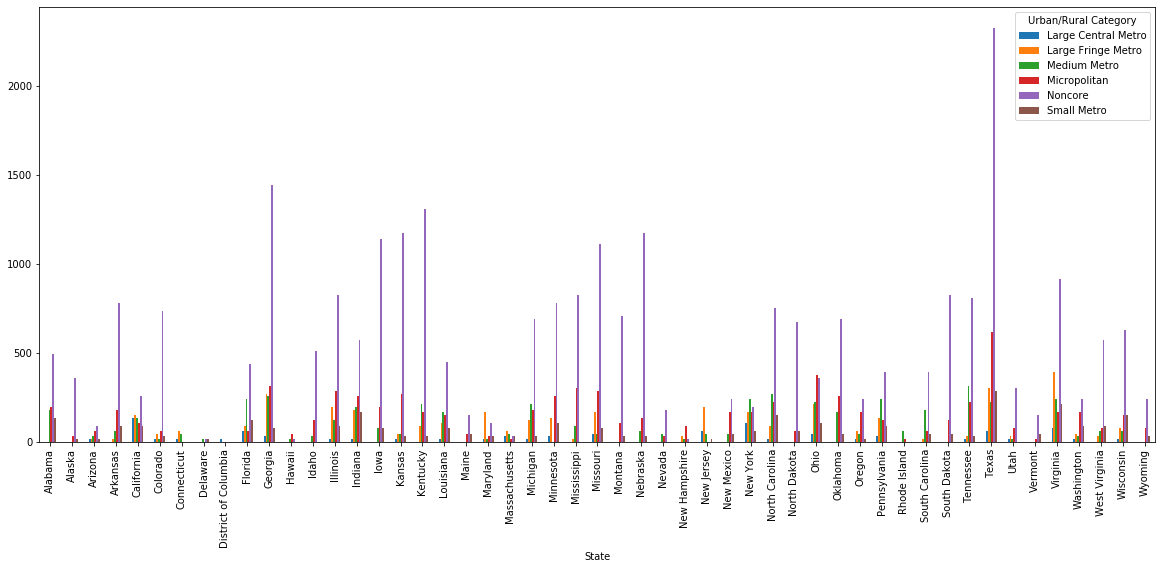

In [45]:
pd.crosstab(df.State,df["Urban/Rural Category"]).plot(kind="bar",
                                                     figsize=(20,8));

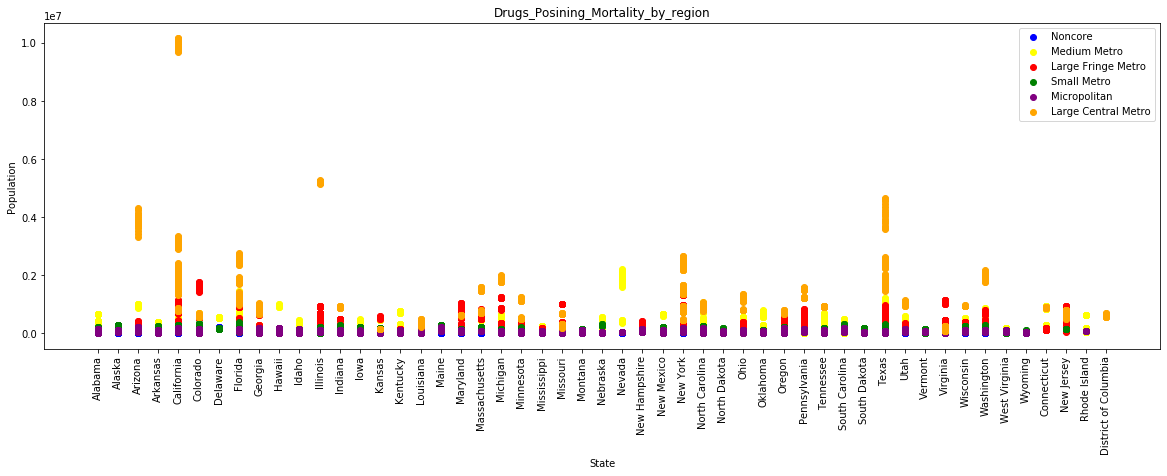

In [46]:
# Scatter Plot to detect the outliers
plt.figure(figsize=(20,6))

plt.scatter(df.State[df["Urban/Rural Category"]=="Noncore"],
           df.Population[df["Urban/Rural Category"]=="Noncore"],
           c = "Blue");
plt.scatter(df.State[df["Urban/Rural Category"]=="Medium Metro"],
           df.Population[df["Urban/Rural Category"]=="Medium Metro"],
           c = "Yellow");
plt.scatter(df.State[df["Urban/Rural Category"]=="Large Fringe Metro"],
           df.Population[df["Urban/Rural Category"]=="Large Fringe Metro"],
           c = "Red");
plt.scatter(df.State[df["Urban/Rural Category"]=="Small Metro"],
           df.Population[df["Urban/Rural Category"]=="Small Metro"],
           c = "Green");
plt.scatter(df.State[df["Urban/Rural Category"]=="Micropolitan"],
           df.Population[df["Urban/Rural Category"]=="Micropolitan"],
           c = "Purple");
plt.scatter(df.State[df["Urban/Rural Category"]=="Large Central Metro"],
           df.Population[df["Urban/Rural Category"]=="Large Central Metro"],
           c = "Orange");


plt.title("Drugs_Posining_Mortality_by_region")
plt.xlabel("State")
plt.ylabel("Population")
plt.legend(["Noncore","Medium Metro","Large Fringe Metro","Small Metro","Micropolitan","Large Central Metro"])
plt.xticks(rotation=90);

### In above scatter plot we have outlier values that are mostly from Large Central Metro Category

In [47]:
pd.crosstab(df["Census Division"],df["Urban/Rural Category"])

Urban/Rural Category  Large Central Metro  Large Fringe Metro  Medium Metro  \
Census Division                                                               
1                                      45                 150           165   
2                                     195                 495           525   
3                                     105                 780           810   
4                                      90                 345           225   
5                                     210                1050          1275   
6                                      15                 135           795   
7                                      75                 420           615   
8                                      45                  90           180   
9                                     165                 255           225   

Urban/Rural Category  Micropolitan  Noncore  Small Metro  
Census Division                                           
1                              180      345          120  
2                              285      585          165  
3                             1245     3075          540  
4                             1320     6870          420  
5                              930     4620          735  
6                              885     3435          195  
7                             1200     4245          495  
8                              690     3000          150  
9                              510     1110          210

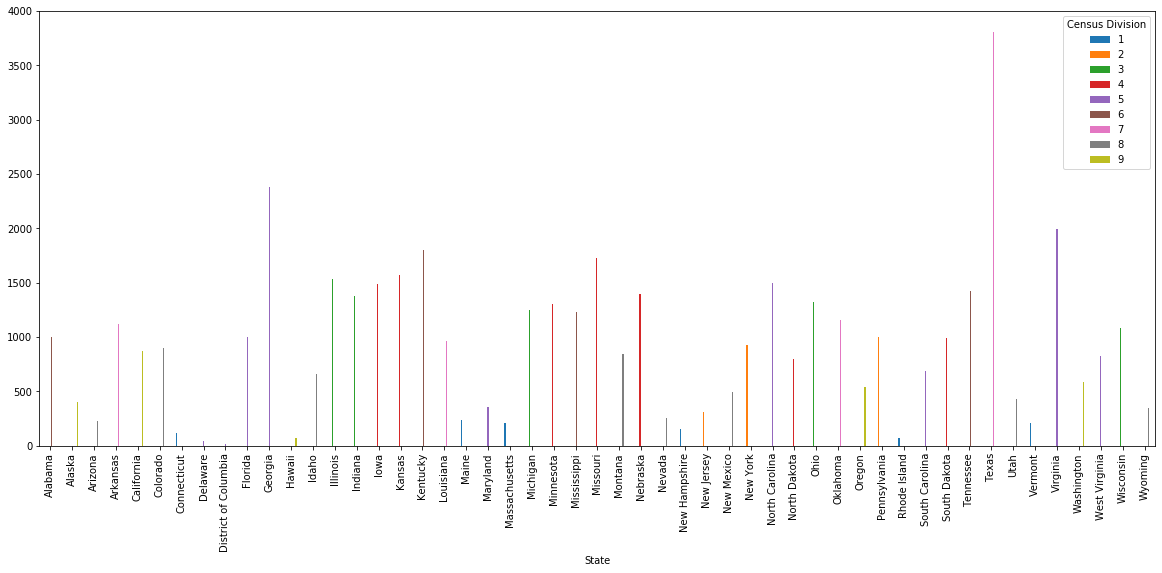

In [48]:
pd.crosstab(df.State,df["Census Division"]).plot(kind="bar",
                                                     figsize=(20,8));

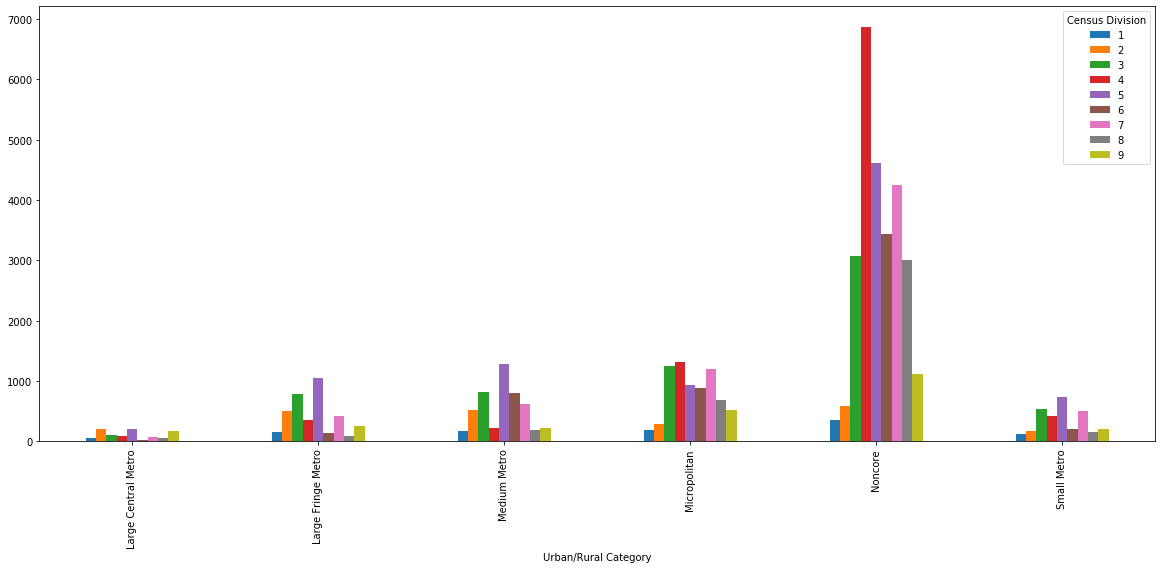

In [49]:
pd.crosstab(df["Urban/Rural Category"],df["Census Division"]).plot(kind="bar",
                                                     figsize=(20,8));

In [50]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47040 entries, 0 to 47039
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FIPS                    47040 non-null  int64  
 1   Year                    47040 non-null  int64  
 2   State                   47040 non-null  object 
 3   FIPS State              47040 non-null  int64  
 4   County                  47040 non-null  object 
 5   Population              47040 non-null  int64  
 6   Model-based Death Rate  47040 non-null  float64
 7   Standard Deviation      47040 non-null  float64
 8   Lower Confidence Limit  47040 non-null  float64
 9   Upper Confidence Limit  47040 non-null  float64
 10  Urban/Rural Category    47040 non-null  object 
 11  Census Division         47040 non-null  int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 4.3+ MB


### Changing the Data_Type of String

In [51]:
#Finding the columns which contain strings
for label,columns in df.items():
    if pd.api.types.is_string_dtype(columns):
        print(label)

State
County
Urban/Rural Category


In [52]:
# Turning the string values into category values
for label,columns in df.items():
    if pd.api.types.is_string_dtype(columns):
        df[label] = columns.astype("category").cat.as_ordered()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47040 entries, 0 to 47039
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   FIPS                    47040 non-null  int64   
 1   Year                    47040 non-null  int64   
 2   State                   47040 non-null  category
 3   FIPS State              47040 non-null  int64   
 4   County                  47040 non-null  category
 5   Population              47040 non-null  int64   
 6   Model-based Death Rate  47040 non-null  float64 
 7   Standard Deviation      47040 non-null  float64 
 8   Lower Confidence Limit  47040 non-null  float64 
 9   Upper Confidence Limit  47040 non-null  float64 
 10  Urban/Rural Category    47040 non-null  category
 11  Census Division         47040 non-null  int64   
dtypes: category(3), float64(4), int64(5)
memory usage: 3.5 MB


In [53]:
# Checking wheather String data_type has change or not by checking the category codes
df.State.cat.codes

0         0
1         0
2         0
3         0
4         0
         ..
47035    50
47036    50
47037    50
47038    50
47039    50
Length: 47040, dtype: int8

In [54]:
# Checking wheather String data_type has change or not
df.County.cat.codes

0         109
1         109
2         109
3         109
4         109
         ... 
47035    3019
47036    3019
47037    3019
47038    3019
47039    3019
Length: 47040, dtype: int16

In [55]:
# Checking wheather String data_type has change or not
df["Urban/Rural Category"].cat.codes

0        2
1        2
2        2
3        2
4        2
        ..
47035    4
47036    4
47037    4
47038    4
47039    4
Length: 47040, dtype: int8

### Changing the Data_Type of Category to Numeric

In [56]:
# Checking the columns which are not numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

State
County
Urban/Rural Category


In [57]:
# Turn categorical variables into numbers
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # We add the +1 because pandas encodes missing categories as -1
        df[label] = pd.Categorical(content).codes+1

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47040 entries, 0 to 47039
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FIPS                    47040 non-null  int64  
 1   Year                    47040 non-null  int64  
 2   State                   47040 non-null  int8   
 3   FIPS State              47040 non-null  int64  
 4   County                  47040 non-null  int16  
 5   Population              47040 non-null  int64  
 6   Model-based Death Rate  47040 non-null  float64
 7   Standard Deviation      47040 non-null  float64
 8   Lower Confidence Limit  47040 non-null  float64
 9   Upper Confidence Limit  47040 non-null  float64
 10  Urban/Rural Category    47040 non-null  int8   
 11  Census Division         47040 non-null  int64  
dtypes: float64(4), int16(1), int64(5), int8(2)
memory usage: 3.4 MB


In [60]:
# make a correlation matrix
df.corr()

FIPS          Year         State  \
FIPS                    1.000000e+00  2.244054e-17  9.994321e-01   
Year                    2.244054e-17  1.000000e+00  4.240439e-18   
State                   9.994321e-01  4.240439e-18  1.000000e+00   
FIPS State              9.999753e-01  3.144978e-19  9.994486e-01   
County                  1.127576e-02  0.000000e+00  7.489966e-03   
Population             -5.731144e-02  1.105846e-02 -5.459520e-02   
Model-based Death Rate  2.192535e-02  4.826896e-01  2.154452e-02   
Standard Deviation      2.796808e-02  4.570549e-01  2.556115e-02   
Lower Confidence Limit  1.752748e-02  4.587140e-01  1.779333e-02   
Upper Confidence Limit  2.428915e-02  4.930886e-01  2.320380e-02   
Urban/Rural Category    3.604237e-03 -1.426322e-17  1.706765e-03   
Census Division        -5.455354e-02 -3.476174e-17 -4.887103e-02   

                          FIPS State    County  Population  \
FIPS                    9.999753e-01  0.011276   -0.057311   
Year                    3.144978e-19  0.000000    0.011058   
State                   9.994486e-01  0.007490   -0.054595   
FIPS State              1.000000e+00  0.007711   -0.057016   
County                  7.711332e-03  1.000000    0.011717   
Population             -5.701587e-02  0.011717    1.000000   
Model-based Death Rate  2.236956e-02  0.000122   -0.004486   
Standard Deviation      2.810107e-02 -0.004756   -0.291877   
Lower Confidence Limit  1.803370e-02  0.001426    0.090632   
Upper Confidence Limit  2.464294e-02 -0.001628   -0.099023   
Urban/Rural Category    3.804752e-03 -0.026499   -0.453046   
Census Division        -5.513119e-02  0.006572    0.002722   

                        Model-based Death Rate  Standard Deviation  \
FIPS                                  0.021925            0.027968   
Year                                  0.482690            0.457055   
State                                 0.021545            0.025561   
FIPS State                            0.022370            0.028101   
County                                0.000122           -0.004756   
Population                           -0.004486           -0.291877   
Model-based Death Rate                1.000000            0.833784   
Standard Deviation                    0.833784            1.000000   
Lower Confidence Limit                0.984319            0.723969   
Upper Confidence Limit                0.982713            0.921420   
Urban/Rural Category                 -0.037259            0.271947   
Census Division                       0.085458            0.154104   

                        Lower Confidence Limit  Upper Confidence Limit  \
FIPS                                  0.017527                0.024289   
Year                                  0.458714                0.493089   
State                                 0.017793                0.023204   
FIPS State                            0.018034                0.024643   
County                                0.001426               -0.001628   
Population                            0.090632               -0.099023   
Model-based Death Rate                0.984319                0.982713   
Standard Deviation                    0.723969                0.921420   
Lower Confidence Limit                1.000000                0.935126   
Upper Confidence Limit                0.935126                1.000000   
Urban/Rural Category                 -0.131305                0.065621   
Census Division                       0.059160                0.112403   

                        Urban/Rural Category  Census Division  
FIPS                            3.604237e-03    -5.455354e-02  
Year                           -1.426322e-17    -3.476174e-17  
State                           1.706765e-03    -4.887103e-02  
FIPS State                      3.804752e-03    -5.513119e-02  
County                         -2.649869e-02     6.572406e-03  
Population                     -4.530461e-01     2.722060e-03  
Model-based Death 

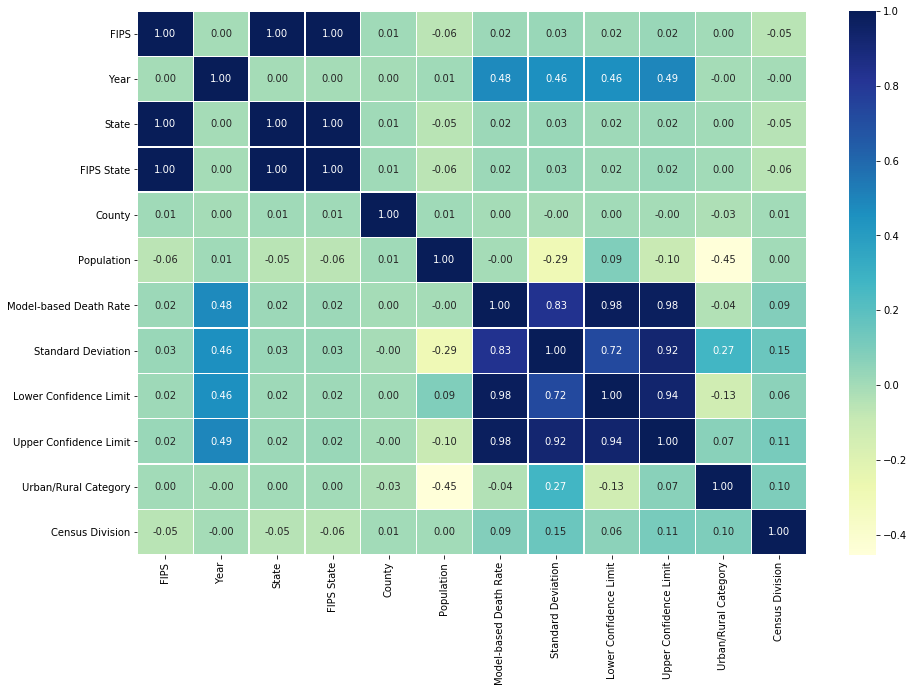

In [61]:
# correlation matrix heatmap
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

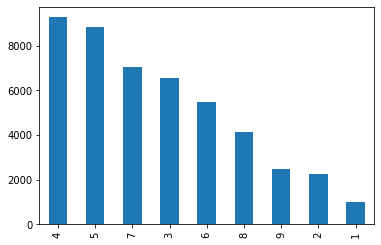

In [62]:
# Diagram before outlier Detection and Treatment
df["Census Division"].value_counts().plot(kind="bar");

### Identifying the outliers with Interquartile Range(IQR)

In [63]:
Q1 = df["Population"].quantile(0.25)
Q3 = df["Population"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

55110.25


In [64]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

        FIPS   Year  State  FIPS State  County  Population  \
0      False  False  False       False   False       False   
1      False  False  False       False   False       False   
2      False  False  False       False   False       False   
3      False  False  False       False   False       False   
4      False  False  False       False   False       False   
...      ...    ...    ...         ...     ...         ...   
47035  False  False  False       False   False       False   
47036  False  False  False       False   False       False   
47037  False  False  False       False   False       False   
47038  False  False  False       False   False       False   
47039  False  False  False       False   False       False   

       Model-based Death Rate  Standard Deviation  Lower Confidence Limit  \
0                       False               False                   False   
1                       False               False                   False   
2                       

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

### Outlier Treatment

In [65]:
df= df[~((df< (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)

(40849, 12)


In [66]:
df

FIPS  Year  State  FIPS State  County  Population  \
0       1001  2003      1           1     110       46800   
1       1001  2004      1           1     110       48366   
2       1001  2005      1           1     110       49676   
3       1001  2006      1           1     110       51328   
4       1001  2007      1           1     110       52405   
...      ...   ...    ...         ...     ...         ...   
47035  56045  2013     51          56    3020        7136   
47036  56045  2014     51          56    3020        7142   
47037  56045  2015     51          56    3020        7181   
47038  56045  2016     51          56    3020        7198   
47039  56045  2017     51          56    3020        6927   

       Model-based Death Rate  Standard Deviation  Lower Confidence Limit  \
0                     6.75227             1.53237                 4.39491   
1                     6.94865             1.44919                 4.64430   
2                     6.58799             1.37660                 4.39989   
3                     8.45433             1.72572                 5.69386   
4                     8.75823             1.77712                 5.90531   
...                       ...                 ...                     ...   
47035                13.07610             2.96147                 8.49958   
47036                13.63690             3.16783                 8.79808   
47037                14.90308             3.46346                 9.61361   
47038                17.22875             4.00558                11.11283   
47039                18.55127             4.31309                11.96617   

       Upper Confidence Limit  Urban/Rural Category  Census Division  
0                    10.37080                     3                6  
1                    10.30284                     3                6  
2                     9.77489                     3                6  
3                    12.43308                     3                6  
4                    12.84598                     3                6  
...                       ...                   ...              ...  
47035                20.05039                     5                8  
47036                21.14985                     5                8  
47037                23.11803                     5                8  
47038                26.73107                     5                8  
47039                28.78342                     5                8  

[40849 rows x 12 columns]

### now the df has change from 47040 rows × 12 columns to 40849 rows × 12 columns

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40849 entries, 0 to 47039
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FIPS                    40849 non-null  int64  
 1   Year                    40849 non-null  int64  
 2   State                   40849 non-null  int8   
 3   FIPS State              40849 non-null  int64  
 4   County                  40849 non-null  int16  
 5   Population              40849 non-null  int64  
 6   Model-based Death Rate  40849 non-null  float64
 7   Standard Deviation      40849 non-null  float64
 8   Lower Confidence Limit  40849 non-null  float64
 9   Upper Confidence Limit  40849 non-null  float64
 10  Urban/Rural Category    40849 non-null  int8   
 11  Census Division         40849 non-null  int64  
dtypes: float64(4), int16(1), int64(5), int8(2)
memory usage: 3.3 MB


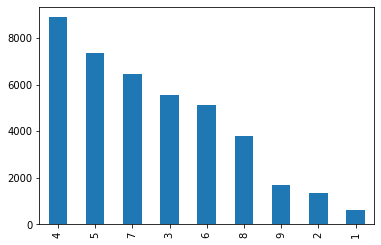

In [68]:
df["Census Division"].value_counts().plot(kind="bar");

In [69]:
pd.crosstab(df.State,df["Census Division"])

Census Division    1    2     3     4     5     6     7    8    9
State                                                            
1                  0    0     0     0     0   895     0    0    0
2                  0    0     0     0     0     0     0    0  390
3                  0    0     0     0     0     0     0  135    0
4                  0    0     0     0     0     0  1080    0    0
5                  0    0     0     0     0     0     0    0  385
6                  0    0     0     0     0     0     0  795    0
7                 18    0     0     0     0     0     0    0    0
8                  0    0     0     0     3     0     0    0    0
10                 0    0     0     0   555     0     0    0    0
11                 0    0     0     0  2186     0     0    0    0
12                 0    0     0     0     0     0     0    0   35
13                 0    0     0     0     0     0     0  627    0
14                 0    0  1335     0     0     0     0    0    0
15                 0    0  1236     0     0     0     0    0    0
16                 0    0     0  1439     0     0     0    0    0
17                 0    0     0  1515     0     0     0    0    0
18                 0    0     0     0     0  1755     0    0    0
19                 0    0     0     0     0     0   841    0    0
20               197    0     0     0     0     0     0    0    0
21                 0    0     0     0   212     0     0    0    0
22                60    0     0     0     0     0     0    0    0
23                 0    0  1005     0     0     0     0    0    0
24                 0    0     0  1201     0     0     0    0    0
25                 0    0     0     0     0  1186     0    0    0
26                 0    0     0  1608     0     0     0    0    0
27                 0    0     0     0     0     0     0  833    0
28                 0    0     0  1355     0     0     0    0    0
29                 0    0     0     0     0     0     0  225    0
30               119    0     0     0     0     0     0    0    0
31                 0   68     0     0     0     0     0    0    0
32                 0    0     0     0     0     0     0  465    0
33                 0  601     0     0     0     0     0    0    0
34                 0    0     0     0  1252     0     0    0    0
35                 0    0     0   787     0     0     0    0    0
36                 0    0  1033     0     0     0     0    0    0
37                 0    0     0     0     0     0  1110    0    0
38                 0    0     0     0     0     0     0    0  439
39                 0  671     0     0     0     0     0    0    0
40                45    0     0     0     0     0     0    0    0
41                 0    0     0     0   528     0     0    0    0
42                 0    0     0   975     0     0     0    0    0
43                 0    0     0     0     0  1297     0    0    0
44                 0    0     0     0     0     0  3426    0    0
45                 0    0     0     0     0     0     0  371    0
46               195    0     0     0     0     0     0    0    0
47                 0    0     0     0  1825     0     0    0    0
48                 0    0     0     0     0     0     0    0  435
49                 0    0     0     0   810     0     0    0    0
50                 0    0   945     0     0     0     0    0    0
51                 0    0     0     0     0     0     0  345    0

### Classification Modelling

In [70]:
df.head()

FIPS  Year  State  FIPS State  County  Population  Model-based Death Rate  \
0  1001  2003      1           1     110       46800                 6.75227   
1  1001  2004      1           1     110       48366                 6.94865   
2  1001  2005      1           1     110       49676                 6.58799   
3  1001  2006      1           1     110       51328                 8.45433   
4  1001  2007      1           1     110       52405                 8.75823   

   Standard Deviation  Lower Confidence Limit  Upper Confidence Limit  \
0             1.53237                 4.39491                10.37080   
1             1.44919                 4.64430                10.30284   
2             1.37660                 4.39989                 9.77489   
3             1.72572                 5.69386                12.43308   
4             1.77712                 5.90531                12.84598   

   Urban/Rural Category  Census Division  
0                     3                6  
1                     3                6  
2                     3                6  
3                     3                6  
4                     3                6

In [71]:
# Split data into X and y
X = df.drop(["Census Division"], axis=1)

y = df["Census Division"]

In [72]:
X

FIPS  Year  State  FIPS State  County  Population  \
0       1001  2003      1           1     110       46800   
1       1001  2004      1           1     110       48366   
2       1001  2005      1           1     110       49676   
3       1001  2006      1           1     110       51328   
4       1001  2007      1           1     110       52405   
...      ...   ...    ...         ...     ...         ...   
47035  56045  2013     51          56    3020        7136   
47036  56045  2014     51          56    3020        7142   
47037  56045  2015     51          56    3020        7181   
47038  56045  2016     51          56    3020        7198   
47039  56045  2017     51          56    3020        6927   

       Model-based Death Rate  Standard Deviation  Lower Confidence Limit  \
0                     6.75227             1.53237                 4.39491   
1                     6.94865             1.44919                 4.64430   
2                     6.58799             1.37660                 4.39989   
3                     8.45433             1.72572                 5.69386   
4                     8.75823             1.77712                 5.90531   
...                       ...                 ...                     ...   
47035                13.07610             2.96147                 8.49958   
47036                13.63690             3.16783                 8.79808   
47037                14.90308             3.46346                 9.61361   
47038                17.22875             4.00558                11.11283   
47039                18.55127             4.31309                11.96617   

       Upper Confidence Limit  Urban/Rural Category  
0                    10.37080                     3  
1                    10.30284                     3  
2                     9.77489                     3  
3                    12.43308                     3  
4                    12.84598                     3  
...                       ...                   ...  
47035                20.05039                     5  
47036                21.14985                     5  
47037                23.11803                     5  
47038                26.73107                     5  
47039                28.78342                     5  

[40849 rows x 11 columns]

In [73]:
X.shape

(40849, 11)

In [74]:
y

0        6
1        6
2        6
3        6
4        6
        ..
47035    8
47036    8
47037    8
47038    8
47039    8
Name: Census Division, Length: 40849, dtype: int64

In [75]:
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [76]:
X_train

FIPS  Year  State  FIPS State  County  Population  \
29938  38023  2016     35          38     788        2389   
15881  21143  2014     18          21    1734        8413   
32425  40073  2013     37          40    1503       15284   
24321  30059  2009     27          30    1873        1897   
35973  46085  2017     42          46    1729        3904   
...      ...   ...    ...         ...     ...         ...   
7923   13299  2006     11          13    2924       35624   
13400  20023  2008     17          20     487        2778   
44019  51730  2012     47          51    2233       31990   
970     1129  2013      1           1    2945       16888   
18476  26013  2014     23          26     129        8640   

       Model-based Death Rate  Standard Deviation  Lower Confidence Limit  \
29938                16.61339             3.89101                10.67839   
15881                17.47530             3.91988                11.38849   
32425                14.43111             3.15863                 9.48276   
24321                11.97081             2.83795                 7.65549   
35973                15.40686             3.58282                 9.91487   
...                       ...                 ...                     ...   
7923                 12.16346             2.49104                 8.17708   
13400                11.24398             2.68159                 7.17292   
44019                12.58940             2.61350                 8.41899   
970                  12.67440             2.74142                 8.37182   
18476                13.52116             3.09233                 8.74675   

       Upper Confidence Limit  Urban/Rural Category  
29938                25.84769                     5  
15881                26.68105                     5  
32425                21.80666                     5  
24321                18.71772                     5  
35973                23.88192                     5  
...                       ...                   ...  
7923                 17.90524                     4  
13400                17.62497                     5  
44019                18.62427                     3  
970                  19.06985                     5  
18476                20.80840                     5  

[32679 rows x 11 columns]

In [77]:
## X and Y both have same number of Rows
y_train

29938    4
15881    6
32425    7
24321    8
35973    4
        ..
7923     5
13400    4
44019    5
970      6
18476    3
Name: Census Division, Length: 32679, dtype: int64

Followed the scikit-learn map for choosing the model

In [79]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Instantiate LinearSVC
clf = LinearSVC(max_iter = 40000)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

C:\Users\ANIKET\Machine_Learning\project_2\project2_env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.12900856793145654

In [80]:
# Now trying the Logistic Regression,KNN, Random Forest
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)   
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [81]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\ANIKET\Machine_Learning\project_2\project2_env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.2744186046511628,
 'KNN': 0.9740514075887393,
 'Random Forest': 0.9998776009791922}

### Comparing the model

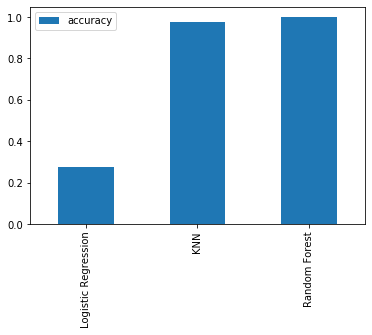

In [82]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Tuning the KNN model to improvement in it

In [89]:
train_scores = []
test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    
    test_scores.append(knn.score(X_test, y_test))

In [90]:
train_scores

[1.0,
 0.9919214174240338,
 0.9904525842284035,
 0.9859236818752104,
 0.9839346369227945,
 0.9794975366443281,
 0.9773554882340341,
 0.9730101900302947,
 0.9704703326295174,
 0.9661862358089293,
 0.9641359894733621,
 0.9600660974938033,
 0.9587196670644756,
 0.9532727439640136,
 0.9521099176841397,
 0.9484990360782154,
 0.9466017932005263,
 0.9423176963799382,
 0.9398084396707366,
 0.9346063221028795]

In [91]:
test_scores

[0.9869033047735618,
 0.9826193390452876,
 0.9824969400244798,
 0.9768665850673195,
 0.9740514075887393,
 0.9681762545899633,
 0.9659730722154223,
 0.9607099143206854,
 0.9585067319461444,
 0.9537331701346389,
 0.9520195838433293,
 0.9472460220318237,
 0.9458996328029375,
 0.9390452876376989,
 0.9351285189718482,
 0.9309669522643819,
 0.9287637698898409,
 0.9246022031823745,
 0.9204406364749081,
 0.9123623011015912]

Maximum KNN score on the test data: 98.69%


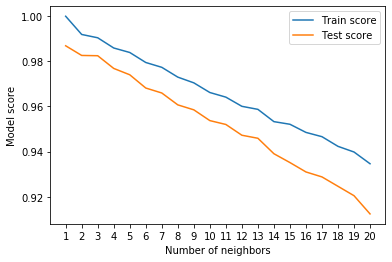

In [92]:

plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

###  Regression Model

In [93]:
df.head()

FIPS  Year  State  FIPS State  County  Population  Model-based Death Rate  \
0  1001  2003      1           1     110       46800                 6.75227   
1  1001  2004      1           1     110       48366                 6.94865   
2  1001  2005      1           1     110       49676                 6.58799   
3  1001  2006      1           1     110       51328                 8.45433   
4  1001  2007      1           1     110       52405                 8.75823   

   Standard Deviation  Lower Confidence Limit  Upper Confidence Limit  \
0             1.53237                 4.39491                10.37080   
1             1.44919                 4.64430                10.30284   
2             1.37660                 4.39989                 9.77489   
3             1.72572                 5.69386                12.43308   
4             1.77712                 5.90531                12.84598   

   Urban/Rural Category  Census Division  
0                     3                6  
1                     3                6  
2                     3                6  
3                     3                6  
4                     3                6

<Figure size 1080x1080 with 0 Axes>

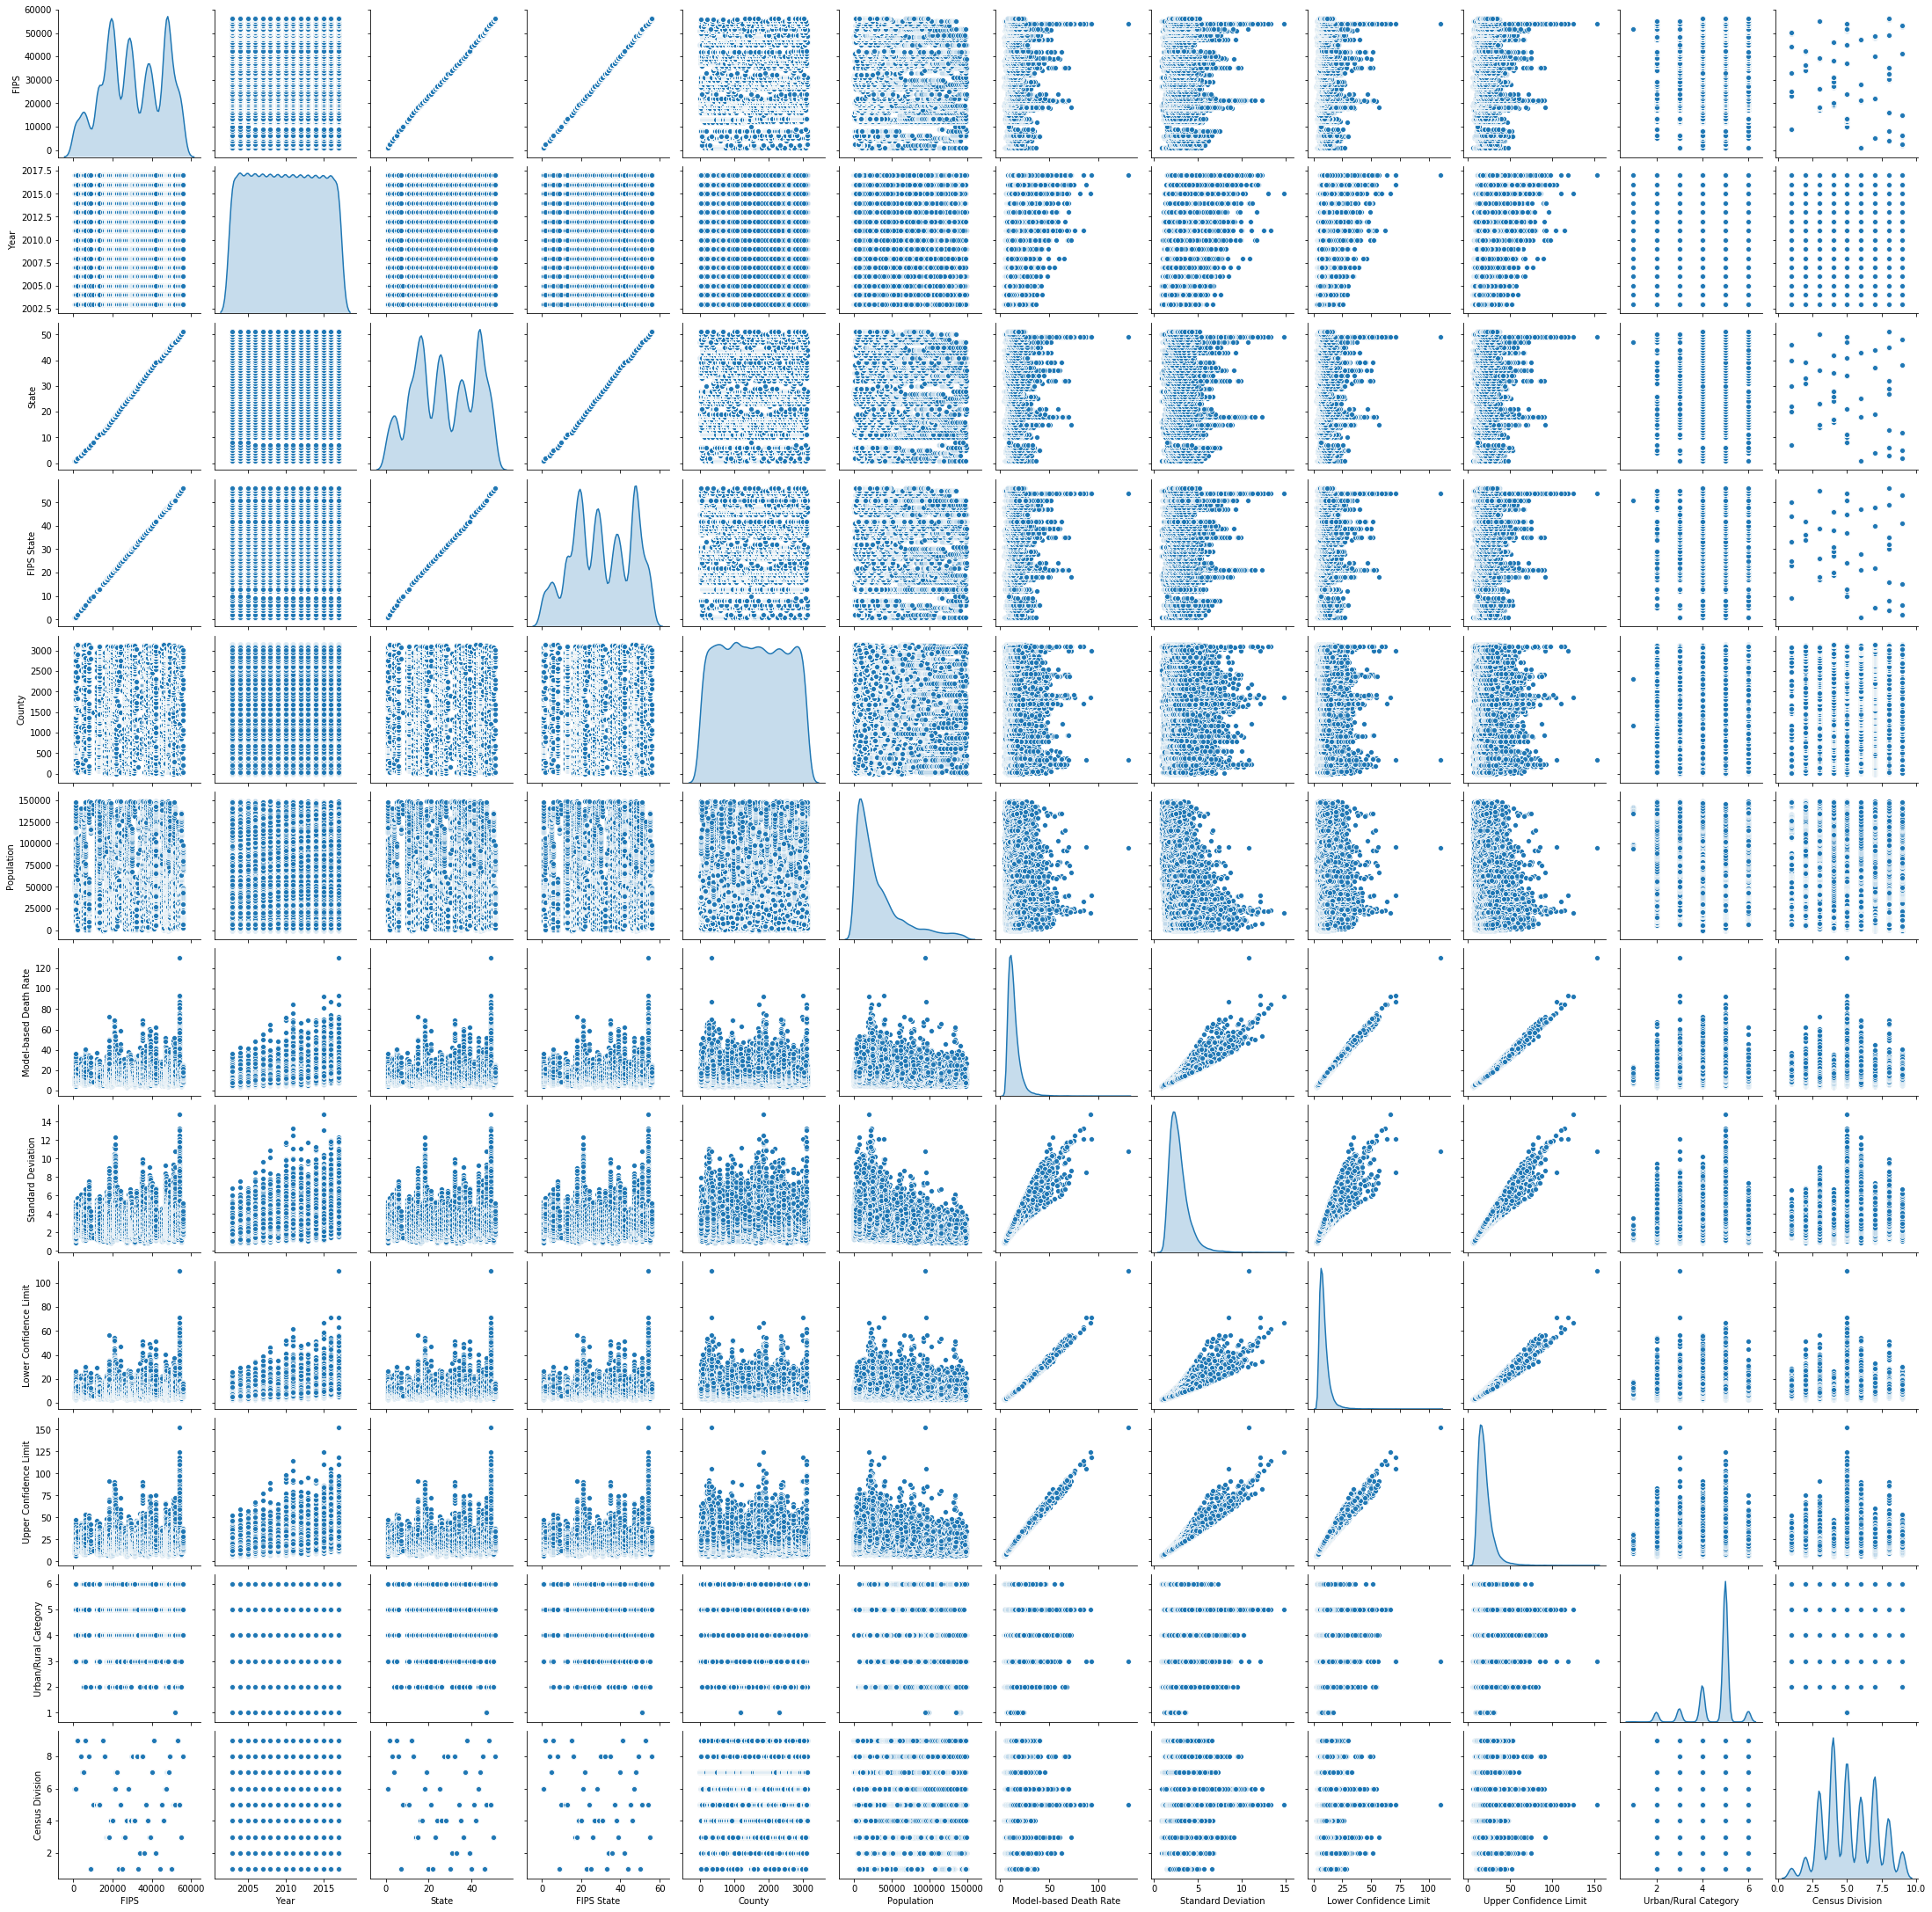

In [120]:
plt.figure(figsize=(15,15))
sns.pairplot(df, diag_kind='kde');

In [95]:
Xl

Upper Confidence Limit
0                    10.37080
1                    10.30284
2                     9.77489
3                    12.43308
4                    12.84598
...                       ...
47035                20.05039
47036                21.14985
47037                23.11803
47038                26.73107
47039                28.78342

[40849 rows x 1 columns]

In [96]:
yl

0         6.75227
1         6.94865
2         6.58799
3         8.45433
4         8.75823
           ...   
47035    13.07610
47036    13.63690
47037    14.90308
47038    17.22875
47039    18.55127
Name: Model-based Death Rate, Length: 40849, dtype: float64

In [97]:
np.random.seed(42)

# Split into train & test set
Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl,
                                                    yl,
                                                    test_size=0.2)

In [98]:
Xl_train

Upper Confidence Limit
29938                25.84769
15881                26.68105
32425                21.80666
24321                18.71772
35973                23.88192
...                       ...
7923                 17.90524
13400                17.62497
44019                18.62427
970                  19.06985
18476                20.80840

[32679 rows x 1 columns]

In [99]:
yl_train

29938    16.61339
15881    17.47530
32425    14.43111
24321    11.97081
35973    15.40686
           ...   
7923     12.16346
13400    11.24398
44019    12.58940
970      12.67440
18476    13.52116
Name: Model-based Death Rate, Length: 32679, dtype: float64

In [100]:
# try linear regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xl_train, yl_train)

model.score(Xl_test, yl_test)

0.9862361761717238

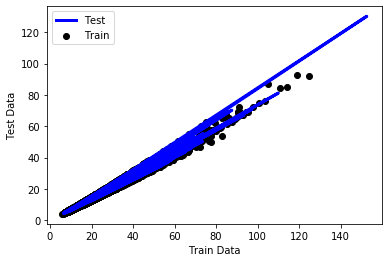

In [107]:
#import matplotlib.pyplot as plt
# Plot outputs
plt.scatter(Xl_train,yl_train,  color='black',label="Train")
plt.plot(Xl_test,yl_test, color='blue', linewidth=3, label="Test")
plt.xlabel("Train Data")
plt.ylabel("Test Data")
plt.legend()


plt.show()

In [108]:
df.head()

FIPS  Year  State  FIPS State  County  Population  Model-based Death Rate  \
0  1001  2003      1           1     110       46800                 6.75227   
1  1001  2004      1           1     110       48366                 6.94865   
2  1001  2005      1           1     110       49676                 6.58799   
3  1001  2006      1           1     110       51328                 8.45433   
4  1001  2007      1           1     110       52405                 8.75823   

   Standard Deviation  Lower Confidence Limit  Upper Confidence Limit  \
0             1.53237                 4.39491                10.37080   
1             1.44919                 4.64430                10.30284   
2             1.37660                 4.39989                 9.77489   
3             1.72572                 5.69386                12.43308   
4             1.77712                 5.90531                12.84598   

   Urban/Rural Category  Census Division  
0                     3                6  
1                     3                6  
2                     3                6  
3                     3                6  
4                     3                6

In [109]:
# Split data into X and y
# Trying other models
X = df.drop(["Model-based Death Rate"], axis=1)

y = df["Model-based Death Rate"]

In [110]:
X

FIPS  Year  State  FIPS State  County  Population  Standard Deviation  \
0       1001  2003      1           1     110       46800             1.53237   
1       1001  2004      1           1     110       48366             1.44919   
2       1001  2005      1           1     110       49676             1.37660   
3       1001  2006      1           1     110       51328             1.72572   
4       1001  2007      1           1     110       52405             1.77712   
...      ...   ...    ...         ...     ...         ...                 ...   
47035  56045  2013     51          56    3020        7136             2.96147   
47036  56045  2014     51          56    3020        7142             3.16783   
47037  56045  2015     51          56    3020        7181             3.46346   
47038  56045  2016     51          56    3020        7198             4.00558   
47039  56045  2017     51          56    3020        6927             4.31309   

       Lower Confidence Limit  Upper Confidence Limit  Urban/Rural Category  \
0                     4.39491                10.37080                     3   
1                     4.64430                10.30284                     3   
2                     4.39989                 9.77489                     3   
3                     5.69386                12.43308                     3   
4                     5.90531                12.84598                     3   
...                       ...                     ...                   ...   
47035                 8.49958                20.05039                     5   
47036                 8.79808                21.14985                     5   
47037                 9.61361                23.11803                     5   
47038                11.11283                26.73107                     5   
47039                11.96617                28.78342                     5   

       Census Division  
0                    6  
1                    6  
2                    6  
3                    6  
4                    6  
...                ...  
47035                8  
47036                8  
47037                8  
47038                8  
47039                8  

[40849 rows x 11 columns]

In [111]:
y

0         6.75227
1         6.94865
2         6.58799
3         8.45433
4         8.75823
           ...   
47035    13.07610
47036    13.63690
47037    14.90308
47038    17.22875
47039    18.55127
Name: Model-based Death Rate, Length: 40849, dtype: float64

In [112]:
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [62]:
X_train

FIPS  Year  State  FIPS State  County  Population  Standard Deviation  \
29938  38023  2016     35          38     788        2389             3.89101   
15881  21143  2014     18          21    1734        8413             3.91988   
32425  40073  2013     37          40    1503       15284             3.15863   
24321  30059  2009     27          30    1873        1897             2.83795   
35973  46085  2017     42          46    1729        3904             3.58282   
...      ...   ...    ...         ...     ...         ...                 ...   
7923   13299  2006     11          13    2924       35624             2.49104   
13400  20023  2008     17          20     487        2778             2.68159   
44019  51730  2012     47          51    2233       31990             2.61350   
970     1129  2013      1           1    2945       16888             2.74142   
18476  26013  2014     23          26     129        8640             3.09233   

       Lower Confidence Limit  Upper Confidence Limit  Urban/Rural Category  \
29938                10.67839                25.84769                     5   
15881                11.38849                26.68105                     5   
32425                 9.48276                21.80666                     5   
24321                 7.65549                18.71772                     5   
35973                 9.91487                23.88192                     5   
...                       ...                     ...                   ...   
7923                  8.17708                17.90524                     4   
13400                 7.17292                17.62497                     5   
44019                 8.41899                18.62427                     3   
970                   8.37182                19.06985                     5   
18476                 8.74675                20.80840                     5   

       Census Division  
29938                4  
15881                6  
32425                7  
24321                8  
35973                4  
...                ...  
7923                 5  
13400                4  
44019                5  
970                  6  
18476                3  

[32679 rows x 11 columns]

In [113]:
## X and Y both have same number of Rows
y_train

29938    16.61339
15881    17.47530
32425    14.43111
24321    11.97081
35973    15.40686
           ...   
7923     12.16346
13400    11.24398
44019    12.58940
970      12.67440
18476    13.52116
Name: Model-based Death Rate, Length: 32679, dtype: float64

In [116]:
# Instantiate SGDRegressor
reg = SGDRegressor()
reg.fit(X_train, y_train)

# Evaluate the LinearSVC
reg.score(X_test, y_test)


-4.46789369030636e+33

In [117]:
# Trying with Ridge() and RandomForestRegressor()
models = {"Ridge": Ridge(),
          "Random Forest":RandomForestRegressor(n_estimators=100) }

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [118]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Ridge': 0.9999257204578474, 'Random Forest': 0.9948454053459539}

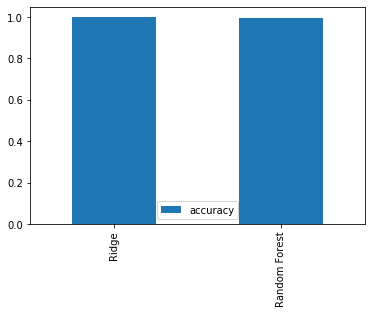

In [119]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [107]:
df

FIPS  Year  State  FIPS State  County  Population  \
0       1001  2003      1           1     110       46800   
1       1001  2004      1           1     110       48366   
2       1001  2005      1           1     110       49676   
3       1001  2006      1           1     110       51328   
4       1001  2007      1           1     110       52405   
...      ...   ...    ...         ...     ...         ...   
47035  56045  2013     51          56    3020        7136   
47036  56045  2014     51          56    3020        7142   
47037  56045  2015     51          56    3020        7181   
47038  56045  2016     51          56    3020        7198   
47039  56045  2017     51          56    3020        6927   

       Model-based Death Rate  Standard Deviation  Lower Confidence Limit  \
0                     6.75227             1.53237                 4.39491   
1                     6.94865             1.44919                 4.64430   
2                     6.58799             1.37660                 4.39989   
3                     8.45433             1.72572                 5.69386   
4                     8.75823             1.77712                 5.90531   
...                       ...                 ...                     ...   
47035                13.07610             2.96147                 8.49958   
47036                13.63690             3.16783                 8.79808   
47037                14.90308             3.46346                 9.61361   
47038                17.22875             4.00558                11.11283   
47039                18.55127             4.31309                11.96617   

       Upper Confidence Limit  Urban/Rural Category  Census Division  
0                    10.37080                     3                6  
1                    10.30284                     3                6  
2                     9.77489                     3                6  
3                    12.43308                     3                6  
4                    12.84598                     3                6  
...                       ...                   ...              ...  
47035                20.05039                     5                8  
47036                21.14985                     5                8  
47037                23.11803                     5                8  
47038                26.73107                     5                8  
47039                28.78342                     5                8  

[40849 rows x 12 columns]